<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

Valorys Trillaud M2 ECAP

## Import package

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [173]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [11]:
#1
#Import dataset from sklearn
sk_iris = datasets.load_iris()

iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

In [70]:
iris.head(5) # visualition des premieres 5 lignes 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris.info()

In [ ]:
features_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris.columns = features_names

#### 2) Statistiques descriptives

In [ ]:
 # Vous pouvez tester Pygwalker ici ?
walker = pyg.walk(iris)

In [ ]:
walker.display_on_jupyter()

In [73]:
iris.describe() # statisitques 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [75]:
iris.isna() # verification des valeurs NA

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
iris.isna().sum() # verification des valeurs NA

In [77]:
iris.hist(figsize=(20, 20), color = "#377eb8")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
import plotly.express as px

correlation =  round(iris.corr(numeric_only = True),  ndigits=2)

fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale = 'Viridis',
                range_color=(0, 1),
                title='Correlation Matrix',
                width=800,
                height=800
            )

fig.update_xaxes(tickangle=40)

fig.show()

#### 3) Recoder variables, si besoin

La variable species est de type float64, mais elle represente une catégorie, donc on peut recoder en categorie, cepandant certains modeles ne fonctionnent pas correctement avec la variable cat, donc va la recoder en int 

In [83]:
#Transformer float en int
iris['species'] = iris.species.astype('int32')

### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [92]:
binary_iris = iris[iris['species'].isin([0, 1])] #création d'un jeu avec 2 especes

#### 4) Découper data set en train et test

In [101]:
# Séparer les features et la cible
X = binary_iris.iloc[:, :-1]
y = binary_iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [105]:
# Vérification 
X_train.info()

(70, 4)

In [107]:
#Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(30, 4)

#### 5) Importer les modules pour la modélisation

In [110]:
#... au début du code
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

In [114]:
# 6. pour garder uniquement 2 colonnes du dataset 
X = binary_iris.iloc[:, [1, 2]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
# SVM avec module SVC 
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

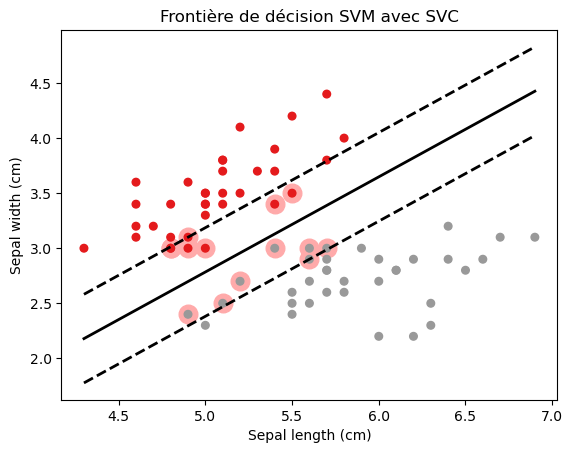

In [52]:
# Tracer la frontière de décision
plot_svc_decision_boundary(svm_clf, X_train[:, 0].min(), X_train[:, 0].max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, s=30)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Frontière de décision SVM avec SVC')
plt.show()


Nous allons le refaire avec les données standardisées 

In [54]:
#Standardiser nos données
X = binary_iris.iloc[:, [2, 3]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 


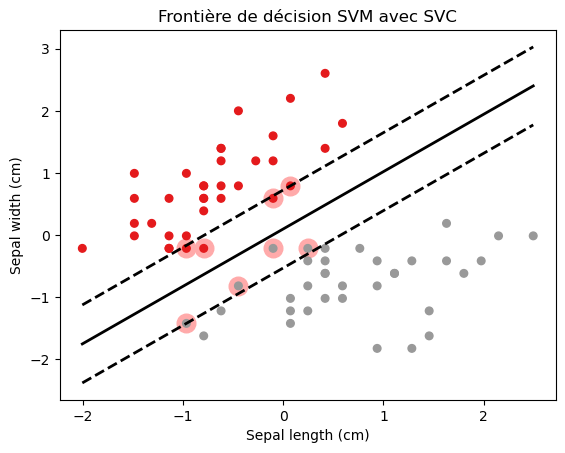

In [56]:
# SVM avec module SVC 
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)


plot_svc_decision_boundary(svm_clf, X_train[:, 0].min(), X_train[:, 0].max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, s=30)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Frontière de décision SVM avec SVC')
plt.show()

### Faire varier le critère de régularisation C

In [ ]:
# SVM avec module SVC 
svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train, y_train)


plot_svc_decision_boundary(svm_clf, X_train[:, 0].min(), X_train[:, 0].max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, s=30)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Frontière de décision SVM avec SVC')
plt.show()

In [ ]:
# SVM avec module SVC 
svm_clf = SVC(kernel='linear', C=20)
svm_clf.fit(X_train, y_train)


plot_svc_decision_boundary(svm_clf, X_train[:, 0].min(), X_train[:, 0].max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, s=30)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Frontière de décision SVM avec SVC')
plt.show()

##### Commenter l'effet de C

C diminue la frontiere de décision

#### Changer de paire de feature

In [161]:
X = binary_iris.iloc[:, [3, 4]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 

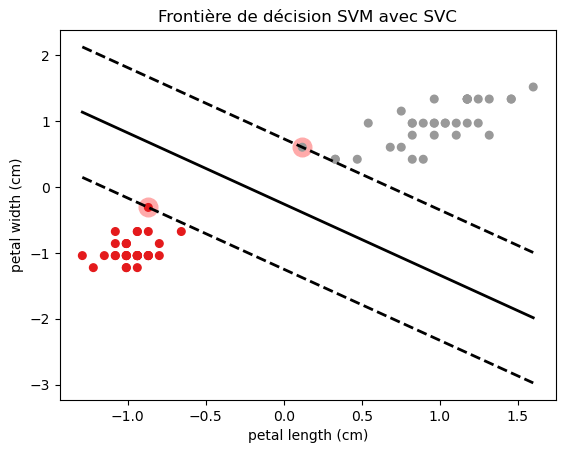

In [188]:
svm_clf = SVC(kernel='linear', C=10)
svm_clf.fit(X_train, y_train)

plot_svc_decision_boundary(svm_clf, X_train[:, 0].min(), X_train[:, 0].max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, s=30)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Frontière de décision SVM avec SVC')
plt.show()

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [200]:
df = pd.read_csv("C:/Users/valor/OneDrive/Bureau/Master 2/SVM et réseaux de neurones/Cours de SVM Python/cours_iae/01_SVM/td/data/iris_noise.csv", sep = ';')

In [204]:
df['species'] = df['species'].astype('int32')
df = df.columns[0:4]
df = df[df.species!=0]

X = df.iloc[:, :-1]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


##### Modélisation binaire, 2 target

In [196]:
#LinearSVC
l_svc= LinearSVC(random_state=42, max_iter=2000)
l_svc.fit(X_train, y_train)


C:\Users\valor\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [157]:
#SGDClassifier
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#SGDClassifier
sdg = SGDClassifier(loss='hinge' ,random_state=42)
sdg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(alpha=0.001))])

In [210]:
#SVC (SVM avec kernel)
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train, y_train)

SVC Accuracy: 0.30


In [208]:
#Regression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

Logistic Regression Accuracy: 0.71


In [226]:
#Correction

#Cross_val_score
cvs_l_svc = cross_val_score(l_svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_sdg = cross_val_score(sdg, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_log_reg = cross_val_score(log_reg, X_train_sc, y_train, cv=5, scoring='accuracy')

array([0.56666667, 0.73333333, 0.62068966, 0.86206897, 0.79310345])

In [ ]:
#Correction
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc']

In [ ]:
df_cross

In [ ]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [ ]:
#Correction 
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

#### Choix du modèle, justification



#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [1434]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [220]:
#Import function
from sklearn.model_selection import GridSearchCV

params = {
    "kernel" : ["linear",'poly'],
    "C" : [0.5, 1, 10, 50,100,1000]
}

c_svc = SVC(random_state=42)

# Set up GridSearchCV
svc_grid = GridSearchCV(
    c_svc, param_grid=params, cv=5, return_train_score=True
)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(alpha=0.01))])

In [ ]:
#Fit model
model_grid = svc_grid.fit(X_train, y_train)

In [ ]:
#Correction
take_grid = model_grid.fit(X_train_sc, y_train)

In [ ]:
take_grid.cv_results_

In [ ]:
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

In [ ]:
#!pip install sklearn_evaluation
plt.figure(figsize=(6,4))
plot.grid_search(take_grid.cv_results_, change='C', kind='bar')

##### Learning curve

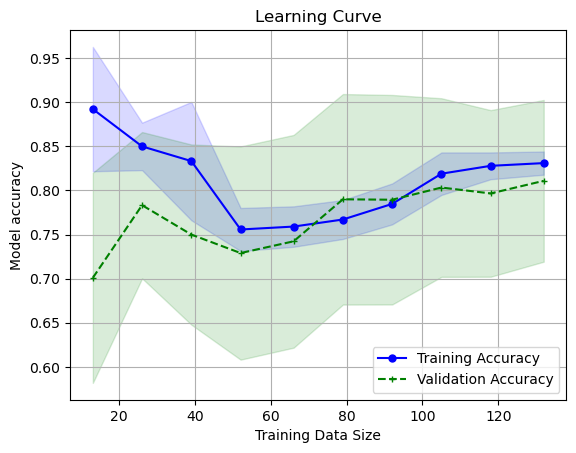

In [228]:
#Ploting learnin curve
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np

# Use learning curve to get training and test scores along with train sizes
#Learning curve function with train_sizes = découpage du dataset en 10 de 10% à 100%
train_sizes, train_scores, test_scores = learning_curve(estimator=c_svc, 
                                                        X=X_train, 
                                                        y=y_train,
                                                        cv=10, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                       )

#
# Trop de fluctuation dans le modèle, on calcule la moyenne des métriques
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [ ]:
take_grid.best_params_

In [ ]:
best_svc = SVC(C=0.5, kernel='linear')

In [ ]:
best_svc.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(3,2))
plot.confusion_matrix(best_svc.predict(X_test), y_test)

##### Commenter la qualité de prédiction



#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [ ]:
print('Training score: ' + str(best_svc.score(X_train,y_train)), 
      '\n',
      'Test score: ' + str(best_svc.score(X_test, y_test))
     )

#### Performance in et out sample

#### Influence de vos features sur le modèle

In [1435]:
plt.title('Influence des paramètre')
plt.xlabel('Valeur des coéfficients')
svm_f_importances(best_svc.coef_[0], features_names)


In [ ]:
# Quelle est la valeur de référence 
svc.classes_[1]

## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [ ]:
#Data from sklearn dataset
sk_iris = datasets.load_iris()
#Pandas
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=list(features_names)+['species'] )
iris['species']=iris.species.astype('int32')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris[features_names],  
                                                    iris['species'], 
                                                    test_size=0.2, 
                                                    random_state=42
                                                   )

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

In [ ]:
#Modéle SVC
c_svc_ovo = SVC(kernel='linear', random_state=42 , C=1, decision_function_shape='ovo')
c_svc_ovr = SVC(kernel='linear', random_state=42 , C=1, decision_function_shape='ovr')

#Declare modèle
OVO_SVC = OneVsOneClassifier(c_svc_ovo)
OVR_SVC = OneVsRestClassifier(c_svc_ovr)

In [ ]:
#Fit the model
OVO_SVC.fit(X_train_sc, y_train)
OVR_SVC.fit(X_train_sc, y_train)


OVO

In [ ]:
#Pour chaque target on obtient une probabilité de score d'appartenance à une espèce
OVO_SVC.decision_function(X_train_sc)

In [ ]:
#On prend le score avec la probabilité max
np.argmax(OVO_SVC.decision_function(X_train_sc), axis=1)

In [ ]:
#Qualité de prédiction du modèle

#Prédiction parfaite!
confusion_matrix(OVO_SVC.predict(X_test_sc), y_test)

OVR

In [ ]:
#Pour chaque target on obtient une probabilité de score d'appartenance à une espèce
OVR_SVC.decision_function(X_train_sc)

In [ ]:
#On prend le score avec la probabilité max
np.argmax(OVR_SVC.decision_function(X_train_sc), axis=1)

In [ ]:
#Qualité de prédiction du modèle

#Prédiction parfaite!
confusion_matrix(OVR_SVC.predict(X_test_sc), y_test)


3) Existe-t-il des différences entre OVO et OVR?

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>